In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 98.9 MB/s eta 0:00:00


In [3]:

!pip install torch
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:

from transformers import BertTokenizer, BertForSequenceClassification

In [5]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [6]:
def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=512,  # Adjust as needed
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )

In [7]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer

# Extract the texts and labels from the CSV files
'''
Combine the 'Title', 'Body', 'Tags', and 'CreationDate' columns into a single string for training texts
Map the 'Y' column values to numeric labels for training labels
Combine the 'Title', 'Body', 'Tags', and 'CreationDate' columns into a single string for validation texts
Map the 'Y' column values to numeric labels for validation labels
'''

# Load train.csv and valid.csv
train_data = pd.read_csv('/content/drive/MyDrive/RIMON/train.csv')
valid_data = pd.read_csv('/content/drive/MyDrive/RIMON/valid.csv')

# Take a subset of 1000 samples for training
train_data = train_data.head(1000)

# Extract the texts and labels from the CSV files
train_texts = train_data['Title'] + ' ' + train_data['Body'] + ' ' + train_data['Tags'] + ' ' + train_data['CreationDate']
train_labels = train_data['Y'].map({'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2})
valid_texts = valid_data['Title'] + ' ' + valid_data['Body'] + ' ' + valid_data['Tags'] + ' ' + valid_data['CreationDate']
valid_labels = valid_data['Y'].map({'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2})


# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize training set
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=512, return_tensors='pt')

# Tokenize validation set
val_encodings = tokenizer(valid_texts.tolist(), truncation=True, padding=True, max_length=512, return_tensors='pt')

# Create PyTorch DataLoader objects
train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_labels.tolist()))
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(valid_labels.tolist()))
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


from transformers import BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Set the device to use (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [8]:
# Set the optimizer and learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)

# Initialize the history dictionary
history = {'avg_loss': [], 'val_accuracy': []}

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [9]:
# Training loop
num_epochs = 5  

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    # Iterate over the training data
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    
    avg_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{num_epochs} - Average Training Loss: {avg_loss:.4f}')
    
    # Evaluation on the validation set
    model.eval()
    total_val_loss = 0
    total_val_correct = 0
    
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            labels = labels.to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            
            total_val_loss += loss.item()
            predicted_labels = torch.argmax(logits, dim=1)
            total_val_correct += (predicted_labels == labels).sum().item()
    
    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = total_val_correct / len(val_dataset)
    
    print(f'Epoch {epoch+1}/{num_epochs} - Average Validation Loss: {avg_val_loss:.4f}')
    print(f'Epoch {epoch+1}/{num_epochs} - Validation Accuracy: {val_accuracy:.4f}')

   # Append training loss and validation accuracy to history
    history['avg_loss'].append(avg_loss)
    history['val_accuracy'].append(val_accuracy)

# Save the fine-tuned model
model.save_pretrained('fine_tuned_model')
tokenizer.save_pretrained('fine_tuned_model')




Epoch 1/5 - Average Training Loss: 0.8110
Epoch 1/5 - Average Validation Loss: 0.5321
Epoch 1/5 - Validation Accuracy: 0.6778
Epoch 2/5 - Average Training Loss: 0.4660
Epoch 2/5 - Average Validation Loss: 0.4100
Epoch 2/5 - Validation Accuracy: 0.8002
Epoch 3/5 - Average Training Loss: 0.3719
Epoch 3/5 - Average Validation Loss: 0.3398
Epoch 3/5 - Validation Accuracy: 0.8581
Epoch 4/5 - Average Training Loss: 0.2452
Epoch 4/5 - Average Validation Loss: 0.3131
Epoch 4/5 - Validation Accuracy: 0.8612
Epoch 5/5 - Average Training Loss: 0.1825
Epoch 5/5 - Average Validation Loss: 0.4001
Epoch 5/5 - Validation Accuracy: 0.8575


('fine_tuned_model/tokenizer_config.json',
 'fine_tuned_model/special_tokens_map.json',
 'fine_tuned_model/vocab.txt',
 'fine_tuned_model/added_tokens.json')

In [10]:

import torch
from transformers import BertForSequenceClassification, BertTokenizer

# Load the fine-tuned model and tokenizer
model = BertForSequenceClassification.from_pretrained('fine_tuned_model')
tokenizer = BertTokenizer.from_pretrained('fine_tuned_model')

# Input text for testing
text = "Accessing pointer member of the structure using structure pointer" #Should show LQ_CLOSE

# Tokenize the input text
tokens = tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=512,
    truncation=True,
    padding='max_length',
    return_attention_mask=True,
    return_tensors='pt'
)

# Forward pass through the model
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']
outputs = model(input_ids, attention_mask=attention_mask)

# Get the predicted label
predicted_label = torch.argmax(outputs.logits, dim=1)

# Convert the predicted label index to the actual category label
label_mapping = {0: 'HQ', 1: 'LQ_EDIT', 2: 'LQ_CLOSE'}
predicted_category = label_mapping[predicted_label.item()]

# Print the predicted category
print(f"Predicted category: {predicted_category}")

Predicted category: LQ_EDIT


In [11]:
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


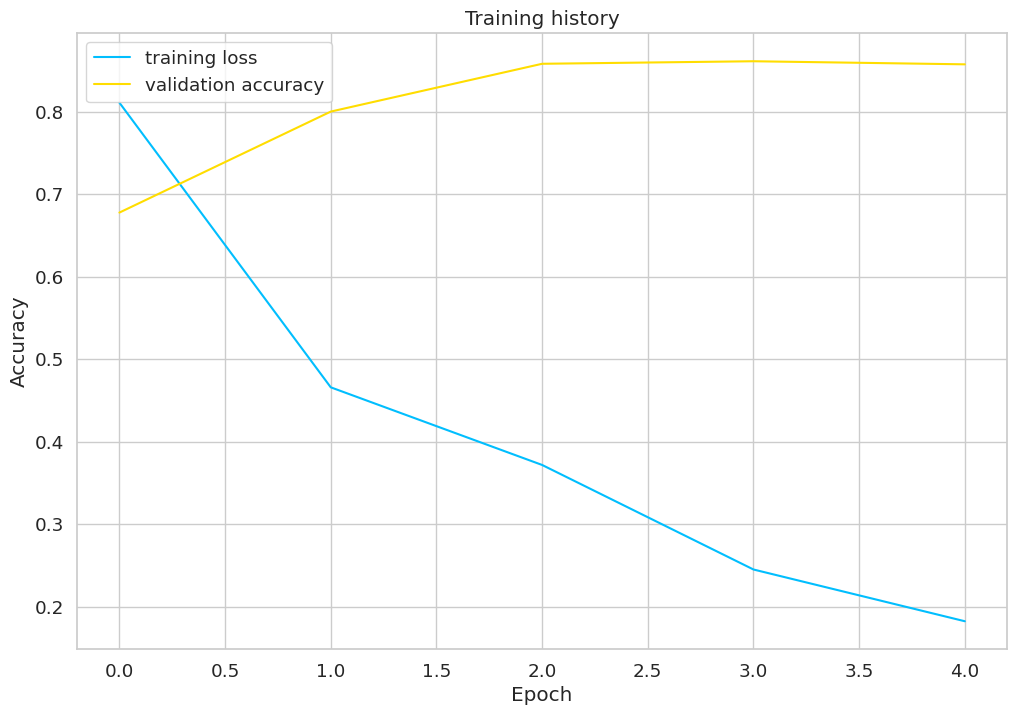

In [12]:
#plot curve training and validation
#Plot training history
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

plt.plot(history['avg_loss'], label='training loss')
plt.plot(history['val_accuracy'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
import torch
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Evaluation on the validation set
model.eval()
val_predictions = []
val_targets = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predicted_labels = torch.argmax(logits, dim=1)

        val_predictions.extend(predicted_labels.cpu().numpy())
        val_targets.extend(labels.cpu().numpy())

# Convert the predictions and targets to numpy arrays
val_predictions = np.array(val_predictions)
val_targets = np.array(val_targets)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(val_targets, val_predictions)

# Calculate the classification report
target_names = ['HQ', 'LQ_EDIT', 'LQ_CLOSE']  # Replace with the actual class labels
classification_rep = classification_report(val_targets, val_predictions, target_names=target_names)

# Plot the confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=target_names, yticklabels=target_names)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(val_targets, val_predictions, target_names=target_names))
